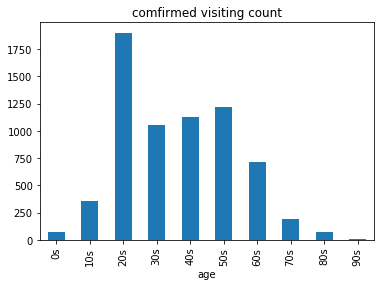

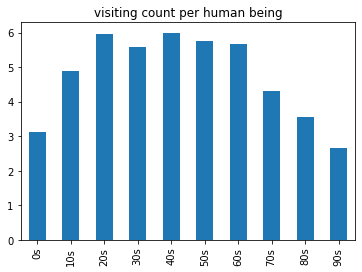

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

time_age = pd.read_csv(r'./data/PatientInfo.csv')
patient_route = pd.read_csv(r'./data/PatientRoute.csv')

joined_df = time_age.merge(patient_route, left_on = 'patient_id', right_on = 'patient_id', how = 'inner')
age_workout = joined_df.groupby('age').type.count()
age_num = joined_df.groupby('age').patient_id.nunique()
age_workout.plot.bar(title = 'comfirmed visiting count')
plt.show()

workout_per_confirmed = pd.Series(name = 'workout_per_confirmed')
for i in range(age_num.shape[0]):
    workout_per_confirmed[f'{i*10}s'] = np.divide(age_workout[i],age_num[i]).round(5)
    
workout_per_confirmed.plot.bar(title = 'visiting count per human being')
plt.show()

(136,)


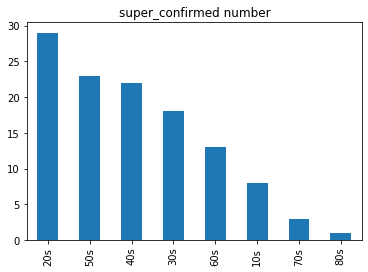

In [181]:
age_num = joined_df.groupby('patient_id').type.count().sort_values(ascending = False)
age_num = age_num[age_num > age_num.quantile(0.9)]
print(age_num.shape)
top_virus = pd.DataFrame()
top_virus['patient_id'] = age_num.index
top_virus['top_virus'] = True
top_virus_df = time_age.merge(top_virus, left_on = 'patient_id', right_on = 'patient_id', how = 'inner')
top_virus_df.age.value_counts().plot.bar(title = 'super_confirmed number')
plt.show()